# Alzheimer Hastalığı ve Sağlıklı Yaşlanma

# Veri Temizleme

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Gerekli kütüphaneleri içe aktar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score


data=pd.read_csv('/content/drive/MyDrive/Alzheimer Disease and Healthy Aging Data In US.csv')



data.columns = data.columns.str.replace('-', '_').str.lower()
data=data[['yearstart','yearend','locationdesc','class','topic','question','data_value_type','data_value','datavaluetypeid','stratification1','stratificationcategory2','stratification2']]
data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-7-f0699a26506a>:17: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('/content/drive/MyDrive/Alzheimer Disease and Healthy Aging Data In US.csv')


,yearstart,yearend,locationdesc,class,topic,question,data_value_type,data_value,datavaluetypeid,stratification1,stratificationcategory2,stratification2
0,2020,2020,Hawaii,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,Percentage,26.3,PRCTG,50-64 years,NaN,NaN
1,2017,2017,Idaho,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,Percentage,24.0,PRCTG,50-64 years,NaN,NaN
2,2017,2017,Idaho,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,Percentage,35.7,PRCTG,50-64 years,NaN,NaN
3,2018,2018,Idaho,Overall Health,Physically unhealthy days (mean number of days),Physically unhealthy days (mean number of days...,Mean,4.8,MEAN,50-64 years,NaN,NaN
4,2020,2020,Indiana,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,Percentage,13.7,PRCTG,Overall,Gender,Male
...,...,...,...,...,...,...,...,...,...,...,...,...
214457,2016,2016,Wyoming,Overall Health,Physically unhealthy days (mean number of days),Physically unhealthy days (mean number of days...,Mean,NaN,MEAN,50-64 years,Race/Ethnicity,"Black, non-Hispanic"
214458,2015,2015,Wyoming,Smoking and Alcohol Use,Current smoking,Percentage of older adults who have smoked at ...,Percentage,NaN,PRCTG,65 years or older,Race/Ethnicity,Asian/Pacific Islander
214459,2017,2017,Wyoming,Overall Health,Self-rated health (fair to poor health),Percentage of older adults who self-reported t...,Percentage,NaN,PRCTG,Overall,Race/Ethnicity,Native Am/Alaskan Native
214460,2016,2016,Wyoming,Overall Health,Fall with injury within last year,Percentage of older adults who have fallen and...,Percentage,10.6,PRCTG,50-64 years,NaN,NaN


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Kategorik sütunları seç
categorical_columns = ['locationdesc', 'class', 'topic', 'question', 'data_value_type', 'stratification1', 'datavaluetypeid','stratificationcategory2', 'stratification2']

# LabelEncoder'ı tanımla
le = LabelEncoder()

# Her bir kategorik sütunu dönerek kodla ve orijinal sütunu sil
for column in categorical_columns:
    data[column + '_le'] = le.fit_transform(data[column])
    data = data.drop(column, axis=1)

# Sonuçları göster
print(data.head())


   yearstart  yearend  data_value  locationdesc_le  class_le  topic_le  \
0       2020     2020        26.3               12         4         0   
1       2017     2017        24.0               13         2        19   
2       2017     2017        35.7               13         4         0   
3       2018     2018         4.8               13         4        26   
4       2020     2020        13.7               15         2        19   

   question_le  data_value_type_le  stratification1_le  datavaluetypeid_le  \
0            9                   1                   0                   1   
1           34                   1                   0                   1   
2            9                   1                   0                   1   
3           37                   0                   0                   0   
4           34                   1                   2                   1   

   stratificationcategory2_le  stratification2_le  
0                           2     

In [ ]:
nan_sayilari = data.isna().sum()
nan_sutunlar = nan_sayilari[nan_sayilari > 0].index.tolist()
print("NaN değerlere sahip sütunlar:", nan_sutunlar)


NaN değerlere sahip sütunlar: ['data_value']


In [ ]:
# Ortalama ile doldur
data['data_value'].fillna(data['data_value'].mode()[0], inplace=True)


In [ ]:
data

,yearstart,yearend,data_value,locationdesc_le,class_le,topic_le,question_le,data_value_type_le,stratification1_le,datavaluetypeid_le,stratificationcategory2_le,stratification2_le
0,2020,2020,26.3,12,4,0,9,1,0,1,2,7
1,2017,2017,24.0,13,2,19,34,1,0,1,2,7
2,2017,2017,35.7,13,4,0,9,1,0,1,2,7
3,2018,2018,4.8,13,4,26,37,0,0,0,2,7
4,2020,2020,13.7,15,2,19,34,1,2,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
214457,2016,2016,6.0,58,4,26,37,0,0,0,1,1
214458,2015,2015,6.0,58,6,4,21,1,1,1,1,0
214459,2017,2017,6.0,58,4,31,32,1,2,1,1,5
214460,2016,2016,10.6,58,4,13,19,1,0,1,2,7


# Modeller

# decision tree, logistic regression and voting classifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#hedef sütunu seç
# Hedef sütunu seç
X = data.drop(columns=['class_le'])
y = data['class_le']


# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelleri oluştur
dt_model = DecisionTreeClassifier()
lr_model = LogisticRegression()

# Hibrit model oluştur
hibrit_model = VotingClassifier(estimators=[
    ('dt', dt_model),
    ('lr', lr_model)
], voting='hard')  # 'hard' oylama kullanıldığı için sınıfların çoğunluğu alınır

# Hibrit modelini eğit
hibrit_model.fit(X_train, y_train)

# Test seti üzerinde tahmin yap
y_pred_hibrit = hibrit_model.predict(X_test)

# Modelin performansını değerlendir
accuracy_hibrit = accuracy_score(y_test, y_pred_hibrit)
print("Hibrit Model Accuracy:", accuracy_hibrit)

# Hassasiyet (Precision)
precision_hibrit = precision_score(y_test, y_pred_hibrit, average='weighted')
print("Hibrit Model Precision:", precision_hibrit)

# Duyarlılık (Recall)
recall_hibrit = recall_score(y_test, y_pred_hibrit, average='weighted')
print("Hibrit Model Recall:", recall_hibrit)

# F1 Puanı
f1_hibrit = f1_score(y_test, y_pred_hibrit, average='weighted')
print("Hibrit Model F1 Score:", f1_hibrit)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Hibrit Model Accuracy: 0.8738255659431609
Hibrit Model Precision: 0.8904396349459037
Hibrit Model Recall: 0.8738255659431609
Hibrit Model F1 Score: 0.8659085029950097


# logistic regression


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Hedef sütunu seç
X = data.drop(columns=['class_le'])
y = data['class_le']

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression modelini oluştur
lr_model = LogisticRegression()

# Modelin performansını değerlendir
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Model Accuracy:", accuracy_lr)

precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
print("Logistic Regression Model Precision:", precision_lr)

recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
print("Logistic Regression Model Recall:", recall_lr)

f1_lr = f1_score(y_test, y_pred_lr, average='weighted')
print("Logistic Regression Model F1 Score:", f1_lr)


Logistic Regression Model Accuracy: 0.39052992329750774
Logistic Regression Model Precision: 0.2741924083663026
Logistic Regression Model Recall: 0.39052992329750774
Logistic Regression Model F1 Score: 0.31460411283918577


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Adaboost Sınıflandırıcı

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Hedef sütunu seç
X = data.drop(columns=['class_le'])
y = data['class_le']

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# AdaBoost modelini oluştur
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)

# Modeli eğit
adaboost_model.fit(X_train, y_train)

# Test seti üzerinde tahmin yap
y_pred_adaboost = adaboost_model.predict(X_test)

# Modelin performansını değerlendir
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
precision_adaboost = precision_score(y_test, y_pred_adaboost, average='weighted')
recall_adaboost = recall_score(y_test, y_pred_adaboost, average='weighted')
f1_adaboost = f1_score(y_test, y_pred_adaboost, average='weighted')

# Sonuçları yazdır
print("AdaBoost Model Metrics:")
print("Accuracy:", accuracy_adaboost)
print("Precision:", precision_adaboost)
print("Recall:", recall_adaboost)
print("F1 Score:", f1_adaboost)


AdaBoost Model Metrics:
Accuracy: 0.33842351898911244
Precision: 0.3006343152958496
Recall: 0.33842351898911244
F1 Score: 0.26626403676537147


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Naive Bayes Classifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Hedef sütunu seç
X = data.drop(columns=['class_le'])
y = data['class_le']

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naive Bayes modelini oluştur (GaussianNB kullanıldı, farklı tipte Naive Bayes modelleri de mevcuttur)
nb_model = GaussianNB()

# Modelin performansını değerlendir
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Model Accuracy:", accuracy_nb)

precision_nb = precision_score(y_test, y_pred_nb, average='weighted')
print("Naive Bayes Model Precision:", precision_nb)

recall_nb = recall_score(y_test, y_pred_nb, average='weighted')
print("Naive Bayes Model Recall:", recall_nb)

f1_nb = f1_score(y_test, y_pred_nb, average='weighted')
print("Naive Bayes Model F1 Score:", f1_nb)


Naive Bayes Model Accuracy: 0.5901429137621523
Naive Bayes Model Precision: 0.7186105284583025
Naive Bayes Model Recall: 0.5901429137621523
Naive Bayes Model F1 Score: 0.5543435721158112


#En İyi Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
import warnings

# Hedef sütunu seç
X = data.drop(columns=['class_le'])
y = data['class_le']

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelleri oluştur
logistic_model = LogisticRegression()
decision_tree_model = DecisionTreeClassifier()
knn_model = KNeighborsClassifier(n_neighbors=3)
nb_model = GaussianNB()

# Hibrit modelini oluştur (VotingClassifier ile)
hibrit_model = VotingClassifier(estimators=[
    ('logistic', logistic_model),
    ('decision_tree', decision_tree_model)
], voting='hard')  # 'hard' oylama kullanıldığı için sınıfların çoğunluğu alınır

# Modelleri eğit ve en iyi modeli belirle
models = [logistic_model, decision_tree_model, knn_model, hibrit_model, nb_model]
best_model_name = None
best_accuracy = 0.0

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    model_name = type(model).__name__

    # En iyi modeli güncelle
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = model_name

print(f"\nEn iyi model: {best_model_name} with Accuracy: {best_accuracy}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


En iyi model: DecisionTreeClassifier with Accuracy: 0.9998834308628447


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

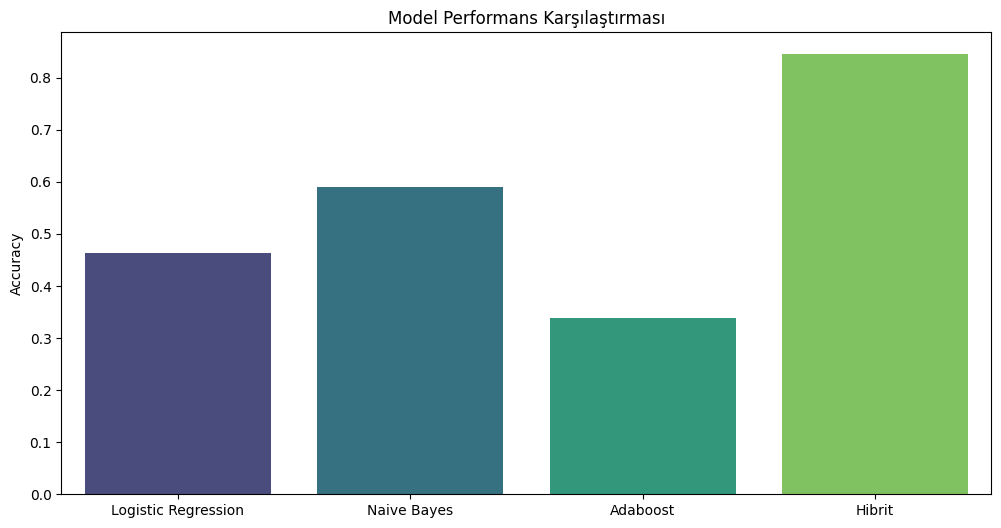

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Hedef sütunu seç
X = data.drop(columns=['class_le'])
y = data['class_le']

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelleri oluştur
logistic_model = LogisticRegression(max_iter=1000)
decision_tree_model = DecisionTreeClassifier()
nb_model = GaussianNB()
adaboost_model = AdaBoostClassifier()

# Hibrit modelini oluştur (VotingClassifier ile)
hibrit_model = VotingClassifier(estimators=[
    ('logistic', logistic_model),
    ('decision_tree', decision_tree_model),
], voting='hard')  # 'hard' oylama kullanıldığı için sınıfların çoğunluğu alınır

# Modelleri eğit
logistic_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)
adaboost_model.fit(X_train, y_train)
hibrit_model.fit(X_train, y_train)

# Modellerin performansını değerlendir
accuracy_logistic = accuracy_score(y_test, logistic_model.predict(X_test))
accuracy_nb = accuracy_score(y_test, nb_model.predict(X_test))
accuracy_adaboost = accuracy_score(y_test, adaboost_model.predict(X_test))
accuracy_hibrit = accuracy_score(y_test, hibrit_model.predict(X_test))

# Performansları listeye ekle
accuracies = [accuracy_logistic, accuracy_nb, accuracy_adaboost, accuracy_hibrit]
models = ['Logistic Regression', 'Naive Bayes', 'Adaboost', 'Hibrit']

# Görselleştirme
plt.figure(figsize=(12, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title('Model Performans Karşılaştırması')
plt.ylabel('Accuracy')
plt.show()


#Grafikler

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


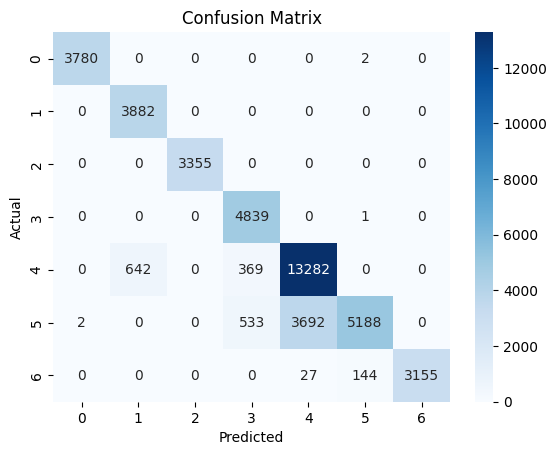

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hibrit modelini eğit
hibrit_model.fit(X_train, y_train)

# Test seti üzerinde tahmin yap
y_pred_hibrit = hibrit_model.predict(X_test)

# Gerçek sınıfları ve tahminleri kullanarak konfüzyon matrisini oluştur
conf_matrix_hibrit = confusion_matrix(y_test, y_pred_hibrit)

# Konfüzyon matrisini görselleştir
sns.heatmap(conf_matrix_hibrit, annot=True, fmt="d", cmap="Blues", xticklabels=hibrit_model.classes_, yticklabels=hibrit_model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


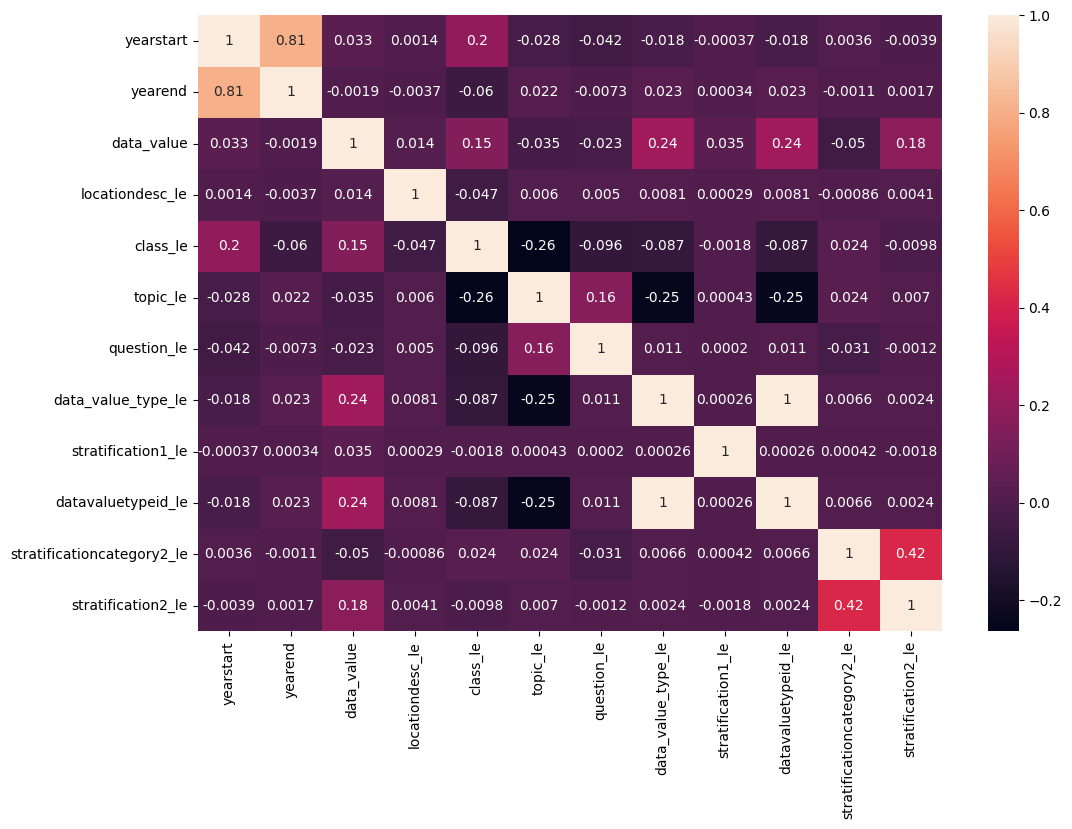

In [ ]:
#korelasyon analizi
plt.figure(figsize=(12,8))
ax = sns.heatmap(data.corr(), annot=True)
plt.show();

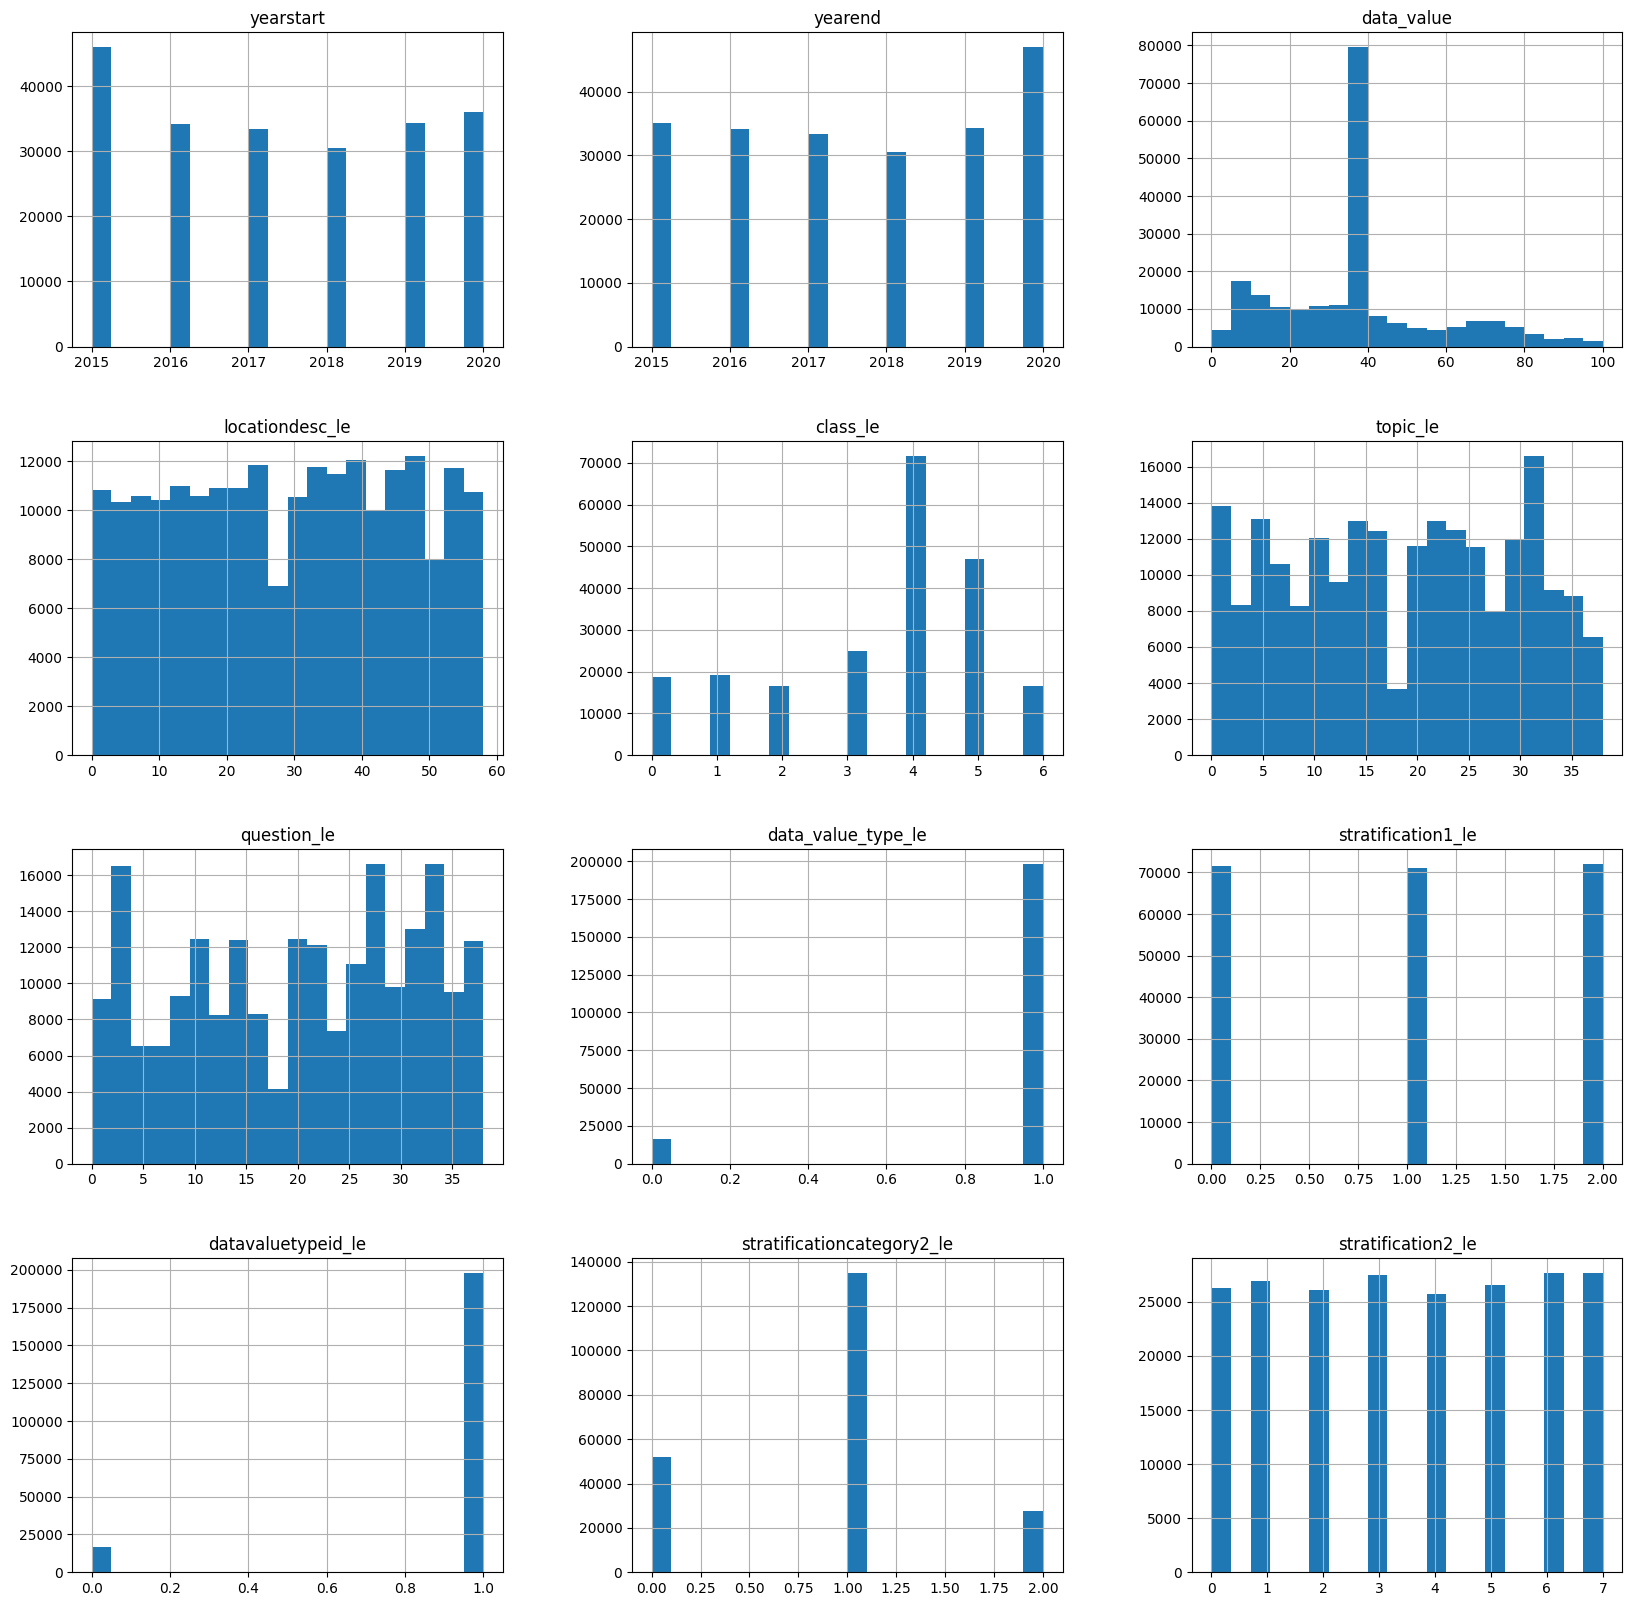

In [ ]:
#Her değişkenin verileri
plt.rcParams["figure.figsize"] = (20, 20)
data.hist(bins=20)
plt.show()

<Figure size 300x100 with 0 Axes>

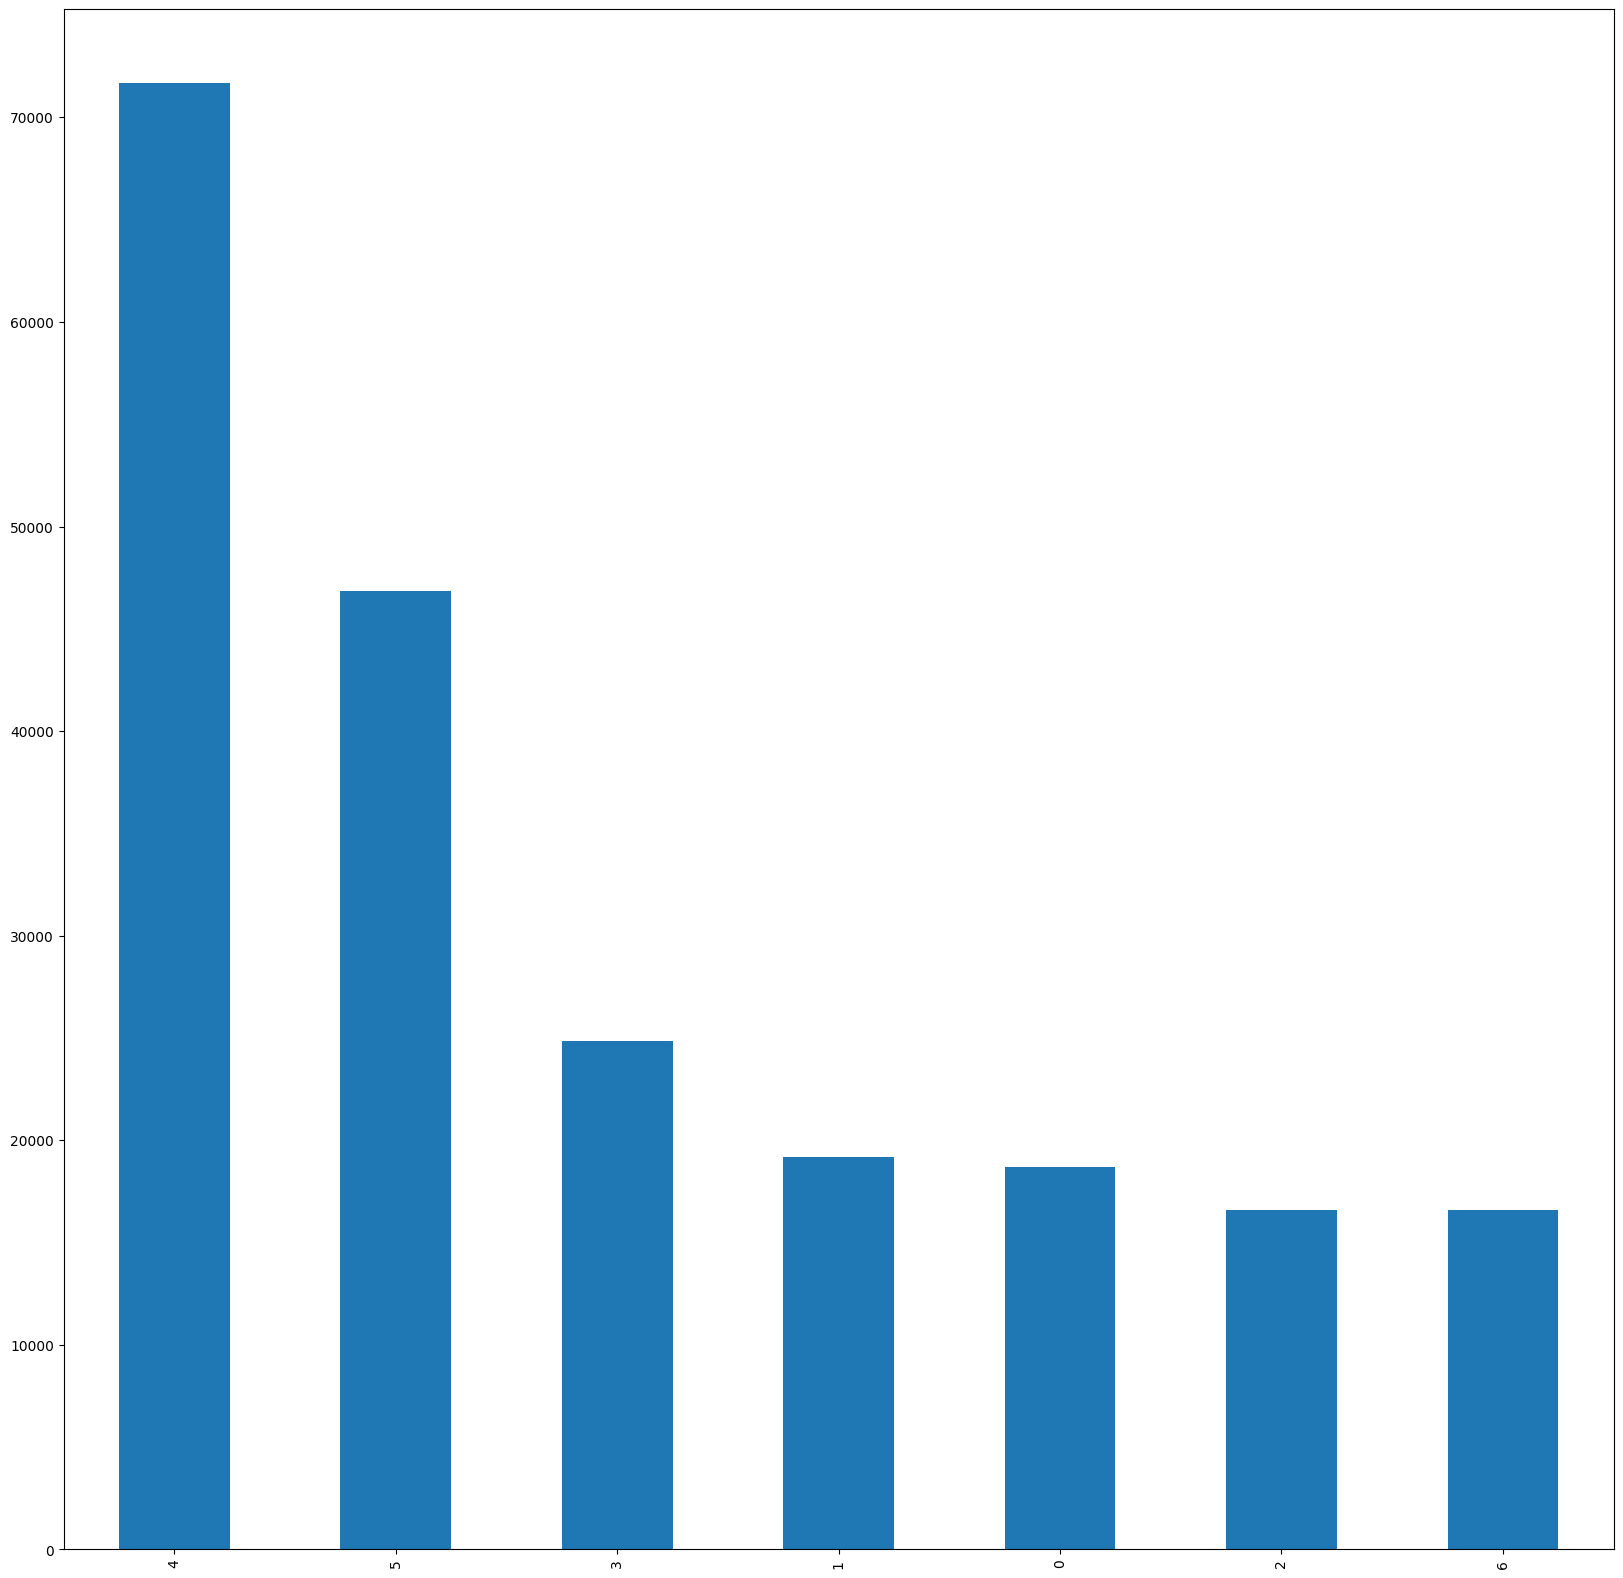

<Figure size 300x100 with 0 Axes>

In [ ]:
data['class_le'].value_counts().plot(kind="bar")
plt.figure(figsize=(3, 1))

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data2=pd.read_csv('/content/drive/MyDrive/Alzheimer Disease and Healthy Aging Data In US.csv')
data2.columns = data2.columns.str.replace('-', '_').str.lower()
data2 = data2.loc[data2['data_value_type']=="Percentage"]
data2=data2[['yearstart','yearend','locationdesc','class','topic','question','data_value_type','data_value','datavaluetypeid','stratification1','stratificationcategory2','stratification2']]
nominals = ['locationdesc','class','topic','question','data_value_type','datavaluetypeid','stratification1','stratification2']
numerics = ['data_value','yearstart','yearend']

<ipython-input-8-2bfd784230cf>:4: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  data2=pd.read_csv('/content/drive/MyDrive/Alzheimer Disease and Healthy Aging Data In US.csv')


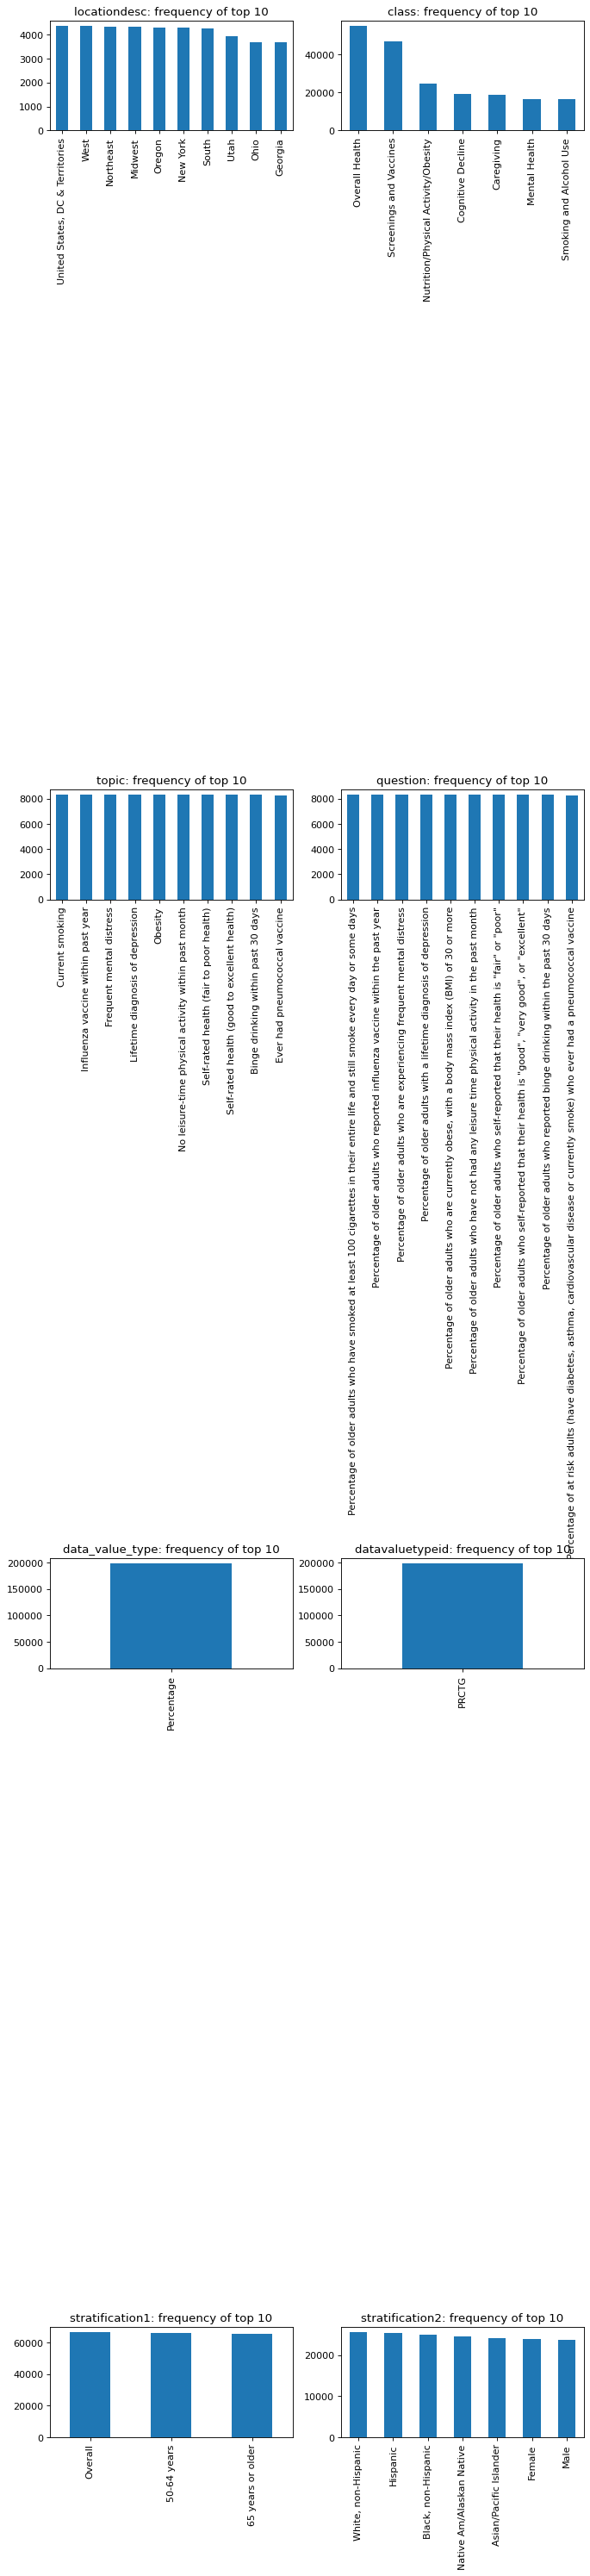

In [ ]:
index = 1
plt.figure(figsize=(10,60), dpi=80).subplots_adjust(hspace=6)
plt.figure(1)
col = 2
row = int(len(nominals) / col) + 1
for attr in nominals:
    plt.subplot(row, col, index)
    index += 1
    freq = 10
    data2[attr].value_counts().head(freq).plot.bar()
    plt.title(f'{attr}: frequency of top {freq}')

count    197929.000000
mean       2017.369006
std           1.785392
min        2015.000000
25%        2016.000000
50%        2017.000000
75%        2019.000000
max        2020.000000
Name: yearstart, dtype: float64


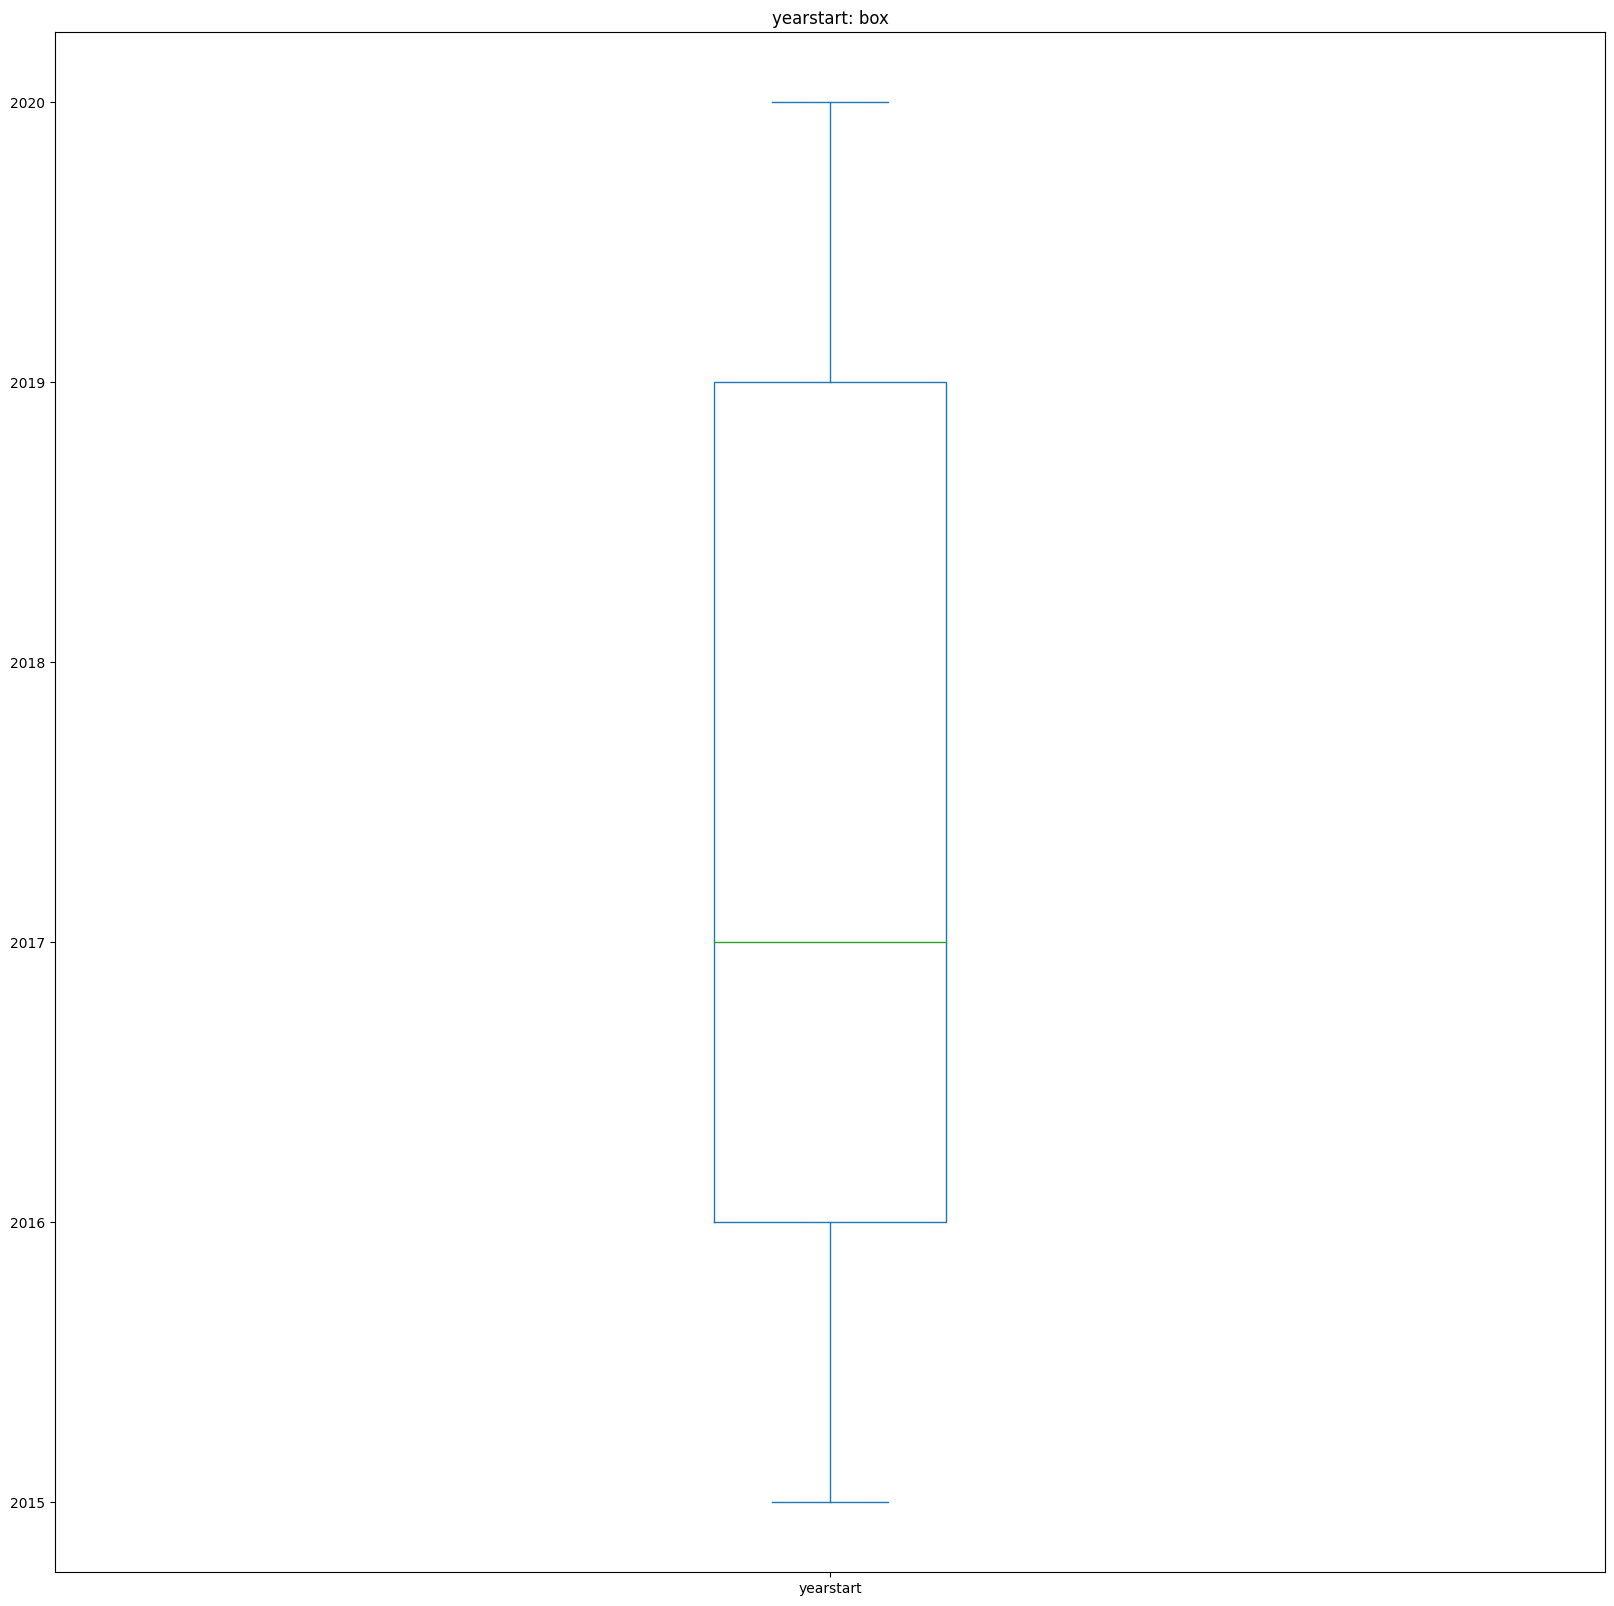

In [ ]:
attr = 'yearstart'
print(data2[attr].describe())
visit = pd.DataFrame(data2[attr])
visit.plot.box()
plt.title(f'{attr}: box')
plt.show()

count    197929.000000
mean       2017.645873
std           1.784238
min        2015.000000
25%        2016.000000
50%        2018.000000
75%        2019.000000
max        2020.000000
Name: yearend, dtype: float64


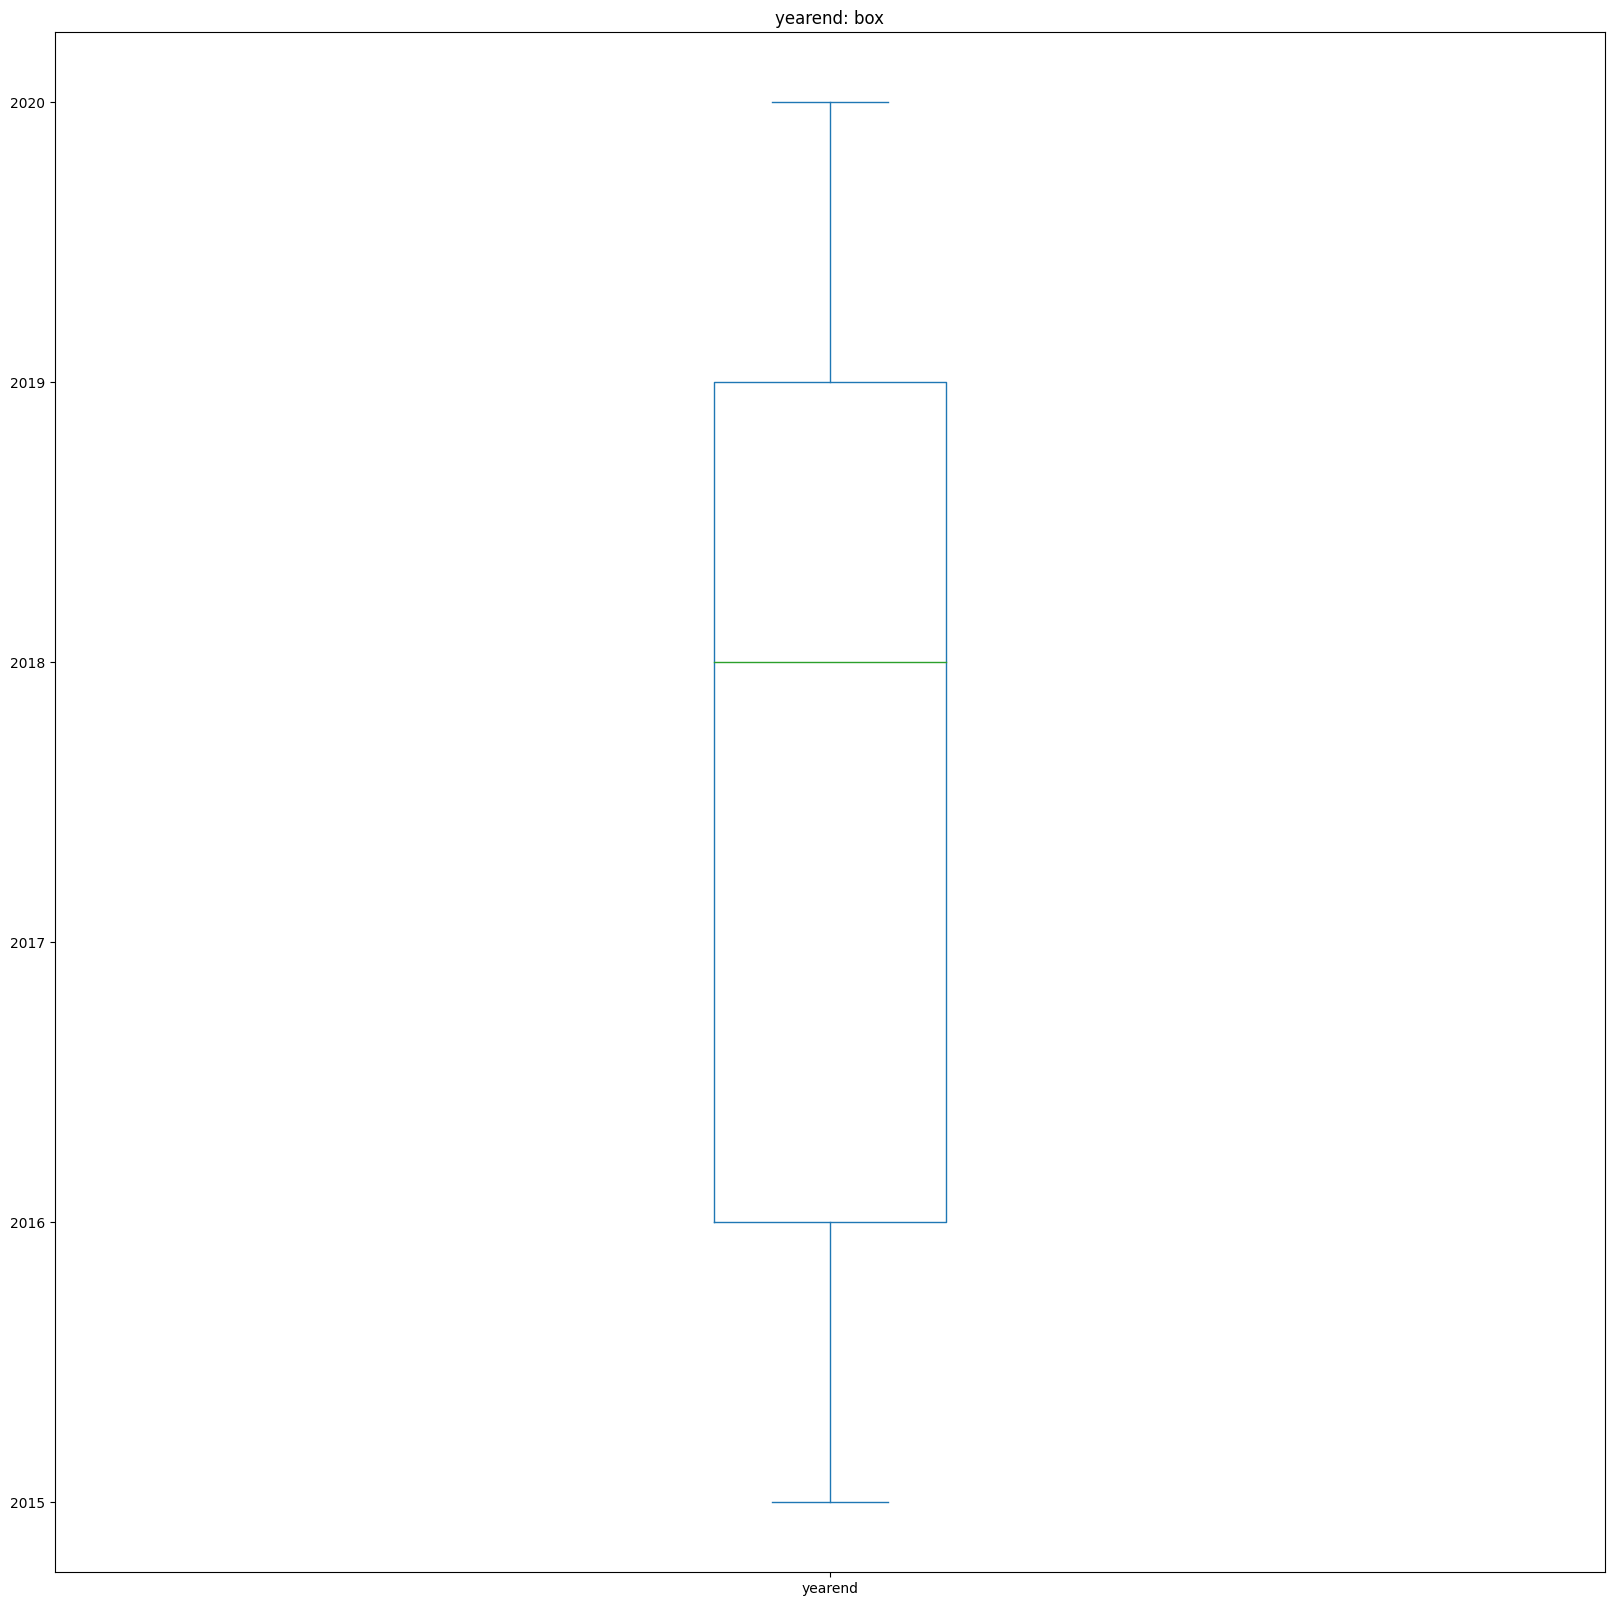

In [ ]:
attr = 'yearend'
print(data2[attr].describe())
visit = pd.DataFrame(data2[attr])
visit.plot.box()
plt.title(f'{attr}: box')
plt.show()

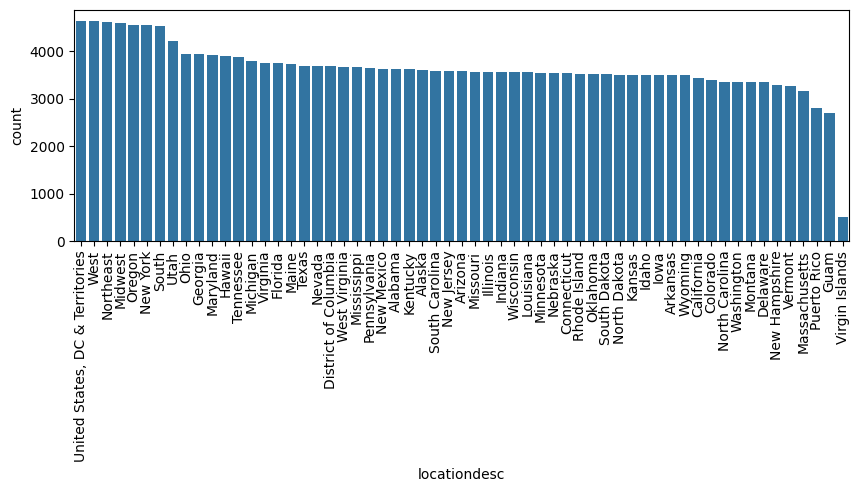

In [ ]:
plt.figure(figsize=(10, 3), dpi=100)
sns.countplot(data=data, x='locationdesc', order=data['locationdesc'].value_counts().index)
plt.xticks(rotation=90)
plt.show()


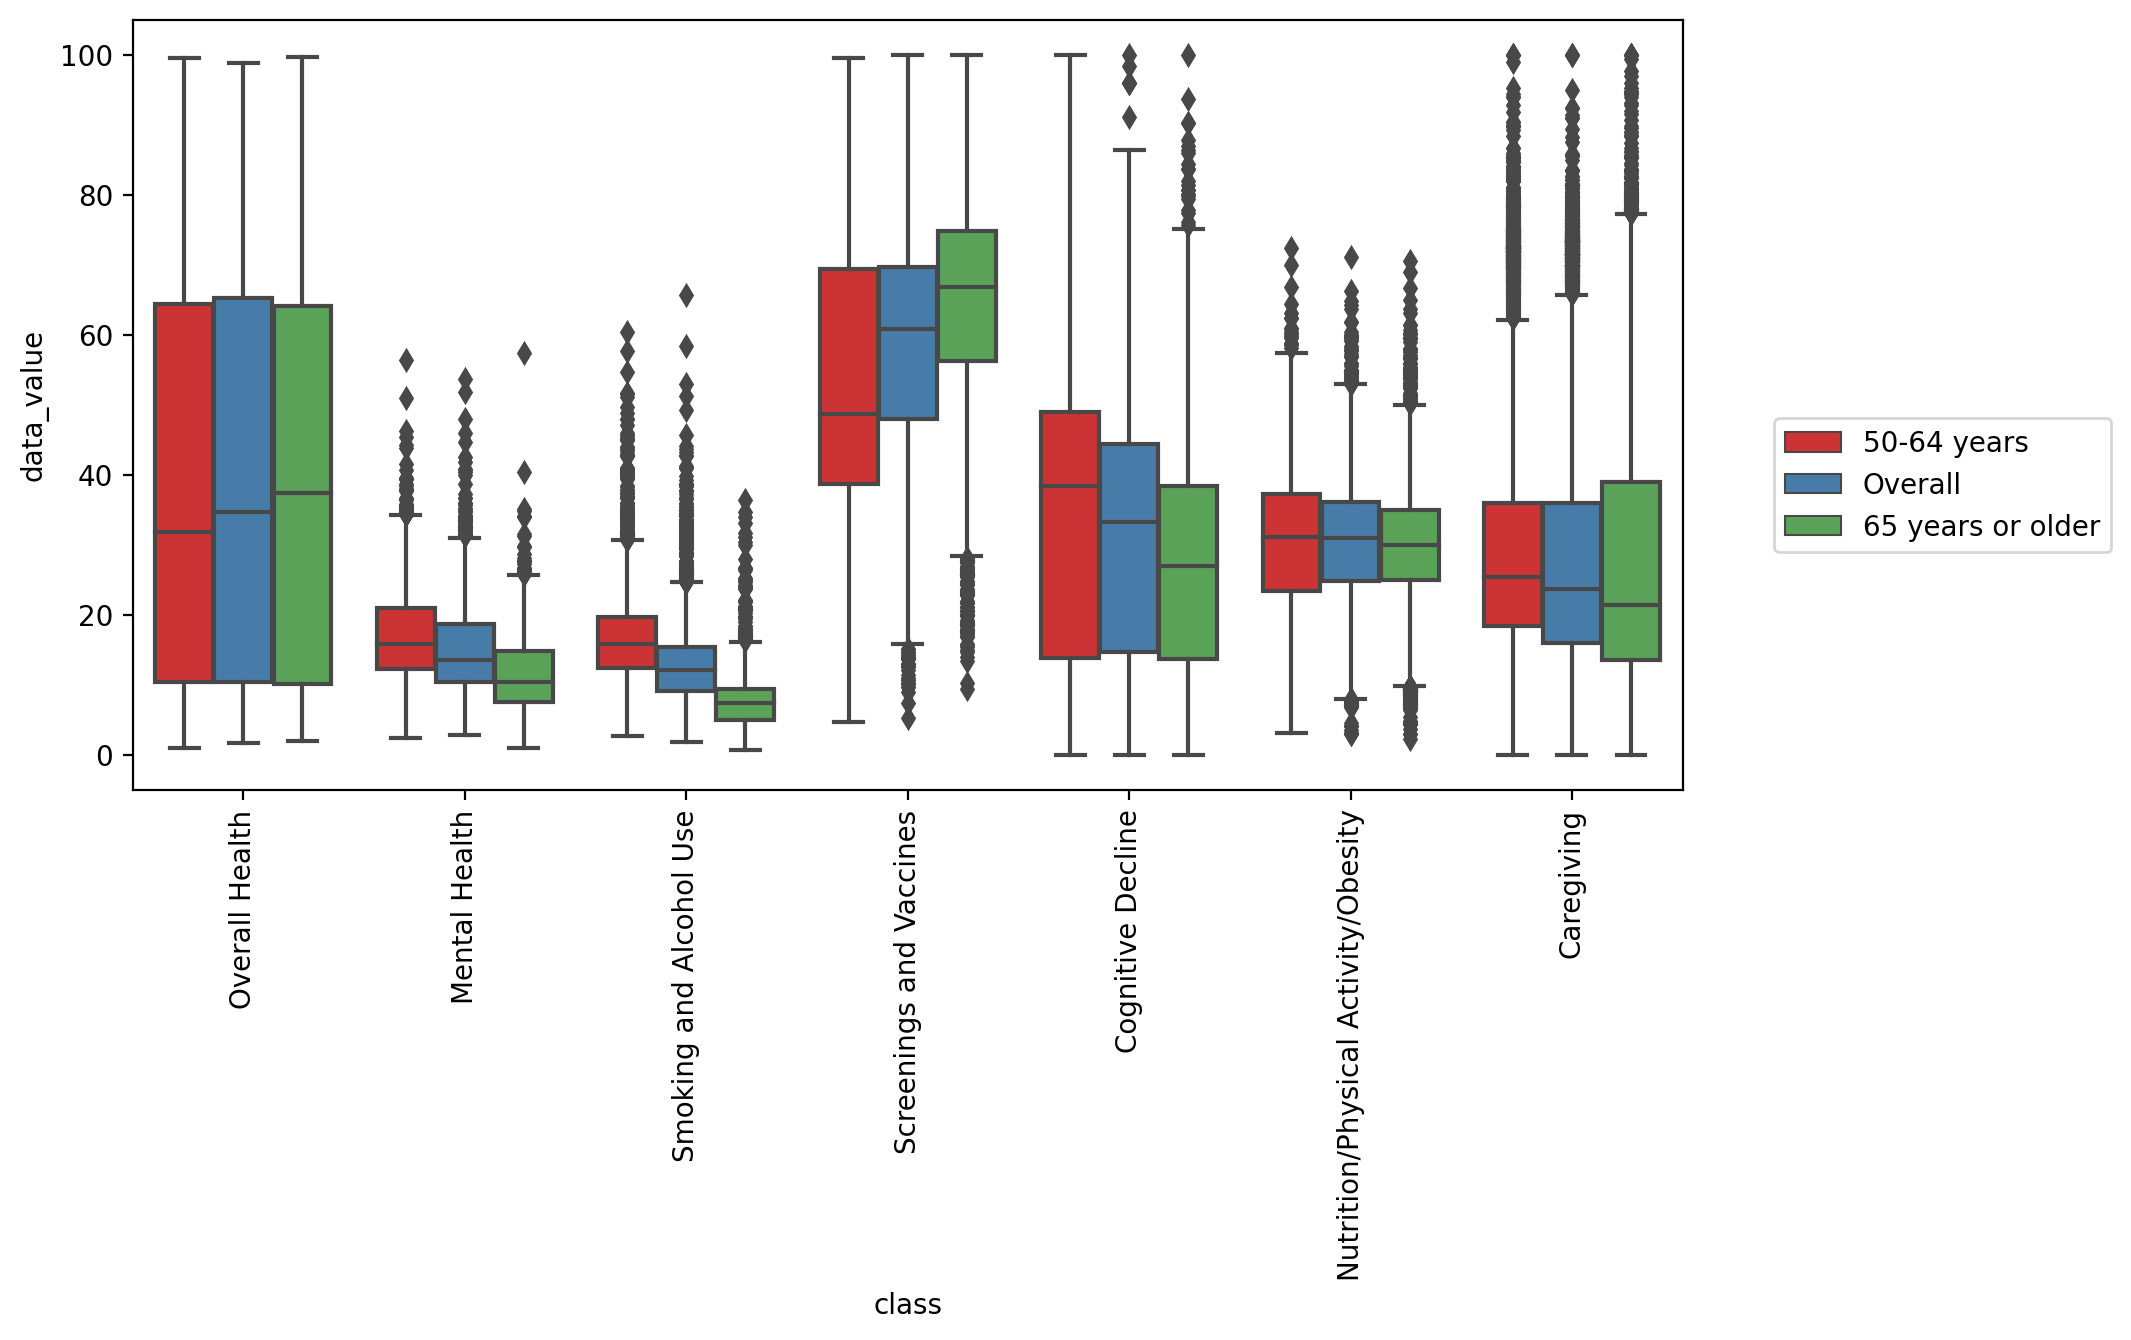

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5), dpi=200)
sns.boxplot(data=data, y='data_value', x='class', hue='stratification1', palette='Set1')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 0.5))
plt.show()


<Axes: xlabel='yearstart', ylabel='Count'>

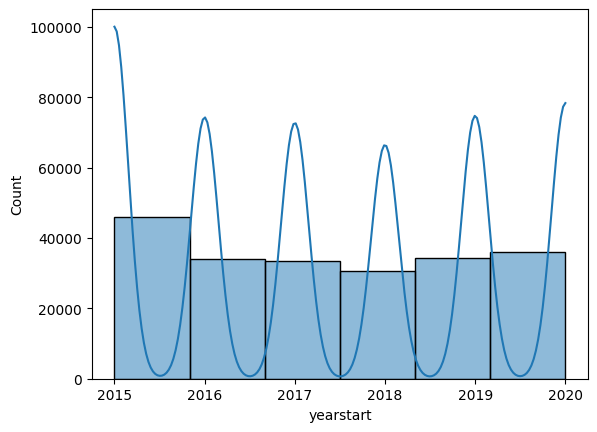

In [ ]:
sns.histplot(data=data, x="yearstart", kde=True, bins = 6)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

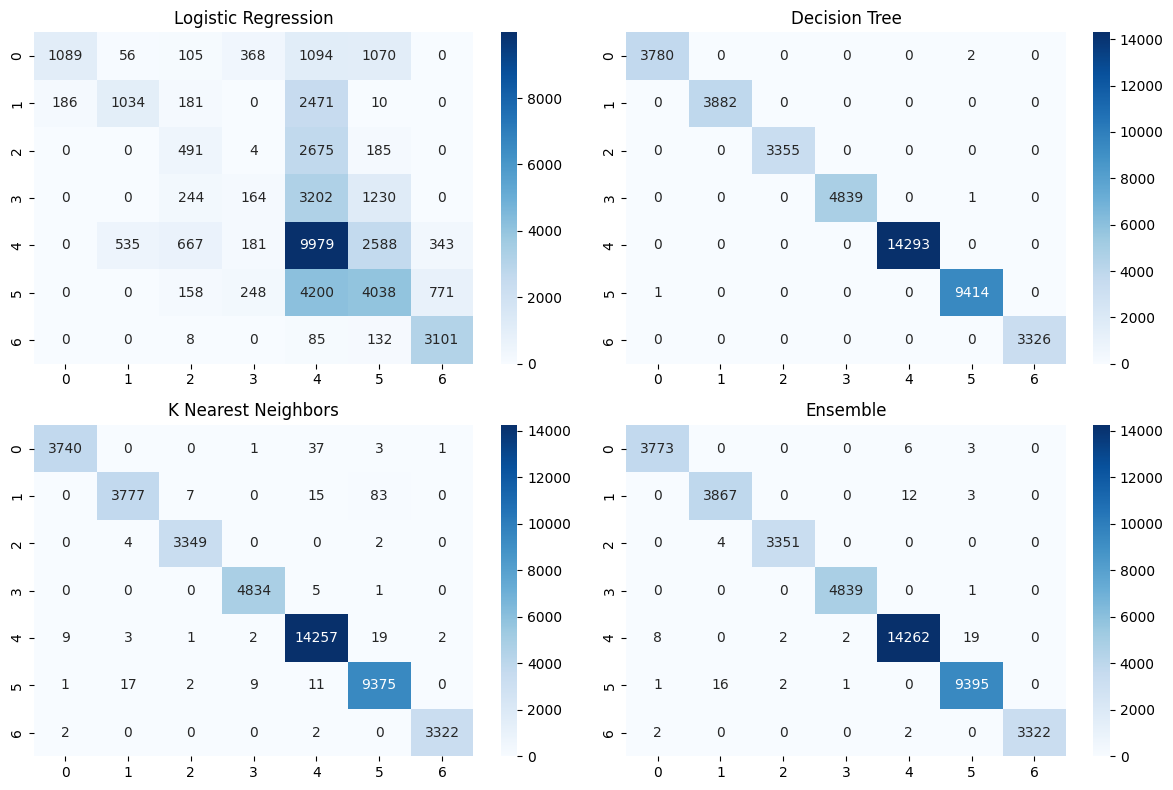

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix
import pandas as pd

# Hedef sütunu seç
X = data.drop(columns=['class_le'])
y = data['class_le']

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelleri oluştur
logistic_model = LogisticRegression(max_iter=1000)
decision_tree_model = DecisionTreeClassifier()
knn_model = KNeighborsClassifier(n_neighbors=3)

# Hibrit modelini oluştur (VotingClassifier ile)
hibrit_model = VotingClassifier(estimators=[
    ('logistic', logistic_model),
    ('decision_tree', decision_tree_model),
    ('knn', knn_model)
], voting='hard')  # 'hard' oylama kullanıldığı için sınıfların çoğunluğu alınır

# Modelleri eğit
logistic_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
hibrit_model.fit(X_train, y_train)

# Modellerin tahminlerini al
y_pred_logistic = logistic_model.predict(X_test)
y_pred_decision_tree = decision_tree_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)
y_pred_hibrit = hibrit_model.predict(X_test)

# Konfüzyon matrisleri
cm_logistic = confusion_matrix(y_test, y_pred_logistic)
cm_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_hibrit = confusion_matrix(y_test, y_pred_hibrit)

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_title('Logistic Regression')

sns.heatmap(cm_decision_tree, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1])
axes[0, 1].set_title('Decision Tree')

sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', ax=axes[1, 0])
axes[1, 0].set_title('K Nearest Neighbors')

sns.heatmap(cm_hibrit, annot=True, fmt='d', cmap='Blues', ax=axes[1, 1])
axes[1, 1].set_title('Hibrit')

plt.tight_layout()
plt.show()
